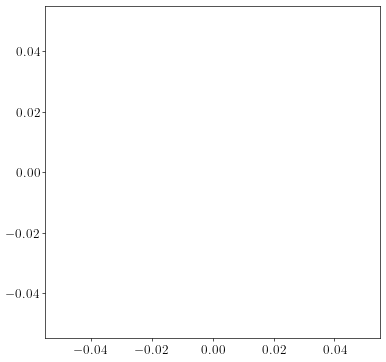

In [1]:
import os
import numpy as np
import pandas as pd
from IPython.display import display, Markdown, Latex
from matplotlib import pyplot as plt

import econtools
from econtools.documents import Homework, RawLatex
from utils import Insurance, Savings
from utils import cbeq, polyeq, term, is_divisible, Number

rng = np.random.default_rng(130)

plt.plot()

SMALL_SIZE = 14
MEDIUM_SIZE = 16
LARGE_SIZE = 18
HUGE_SIZE = 20

plt.rcdefaults()
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.size'] = MEDIUM_SIZE
plt.rcParams['axes.titlesize'] = LARGE_SIZE
plt.rcParams['axes.labelsize'] = MEDIUM_SIZE
plt.rcParams['xtick.labelsize'] = MEDIUM_SIZE
plt.rcParams['ytick.labelsize'] = MEDIUM_SIZE
plt.rcParams['legend.fontsize'] = MEDIUM_SIZE
plt.rcParams['figure.titlesize'] = LARGE_SIZE
plt.rcParams['figure.figsize'] = [7.2, 7.2]
plt.rcParams['figure.dpi'] = 60
plt.rcParams['figure.facecolor'] = (1.0, 1.0, 1.0, 0.0)

filename = "econ-310-hw13"

doc = Homework(
    title = r"Econ 310 Week 13 Homework",
    due_date = r"Tuesday 12/3"
)


In [2]:
K = 5
X = [7, 4, 3, 0, 8]
numers = rng.integers(1,K,size=K)
denom = np.sum(numers)
setup = fr"""
A random variable \(X\) can take on the following values:
\begin{{align*}}
"""
for k in range(K):
    setup += fr"x_{k+1} &= {X[k]:g} \\"
setup += fr"""
\end{{align*}}
with probabilities:
\begin{{align*}}
"""
for k in range(K):
    setup += fr"p_{k+1} &= {Number(numers[k],denom).as_frac(inline=True,rmplus=True)} \\"
setup += fr"""
\end{{align*}}
Calculate the expected value of \(X\).
"""
latex = "\\begin{q}\n" + setup + "\\end{q}\n"
doc.add(RawLatex(latex))
display(Latex(setup))

<IPython.core.display.Latex object>

In [3]:
question = fr"""
Suppose you rolled two six-sided dice.

\begin{{enumerate}}[a.]
\item Explain why there are 36 possible outcomes. What is the probability of each outcome? 
\item What is the expected value of the sum of the two dice rolls?
\end{{enumerate}}
"""
latex = "\\begin{q}\n" + question + "\\end{q}\n"
doc.add(RawLatex(latex))
display(Latex(question))


<IPython.core.display.Latex object>

In [4]:
fun = 'ln'
W = 3000
p = 0.25
D = 800
params = {'W':W, 'p':p, 'D':D, 'fun':fun}
prob = Insurance(params)
if fun=='ln':
    myfunstr = fr'\ln X'
elif fun=='sqrt':
    myfunstr = fr'\sqrt{{X}}'
question = fr"""
Jimmy has an initial wealth of ${W:,g}$. There is a ${p*100:g}\%$ chance that Jimmy breaks his neighbor's window while playing 
baseball. If he breaks the window, it would cost him ${D:,g}$ to fix the problem. 

Let $X$ be a random representing Jimmy's wealth at the end of the day. Jimmy's utility function over wealth is:

$$u(X) = {myfunstr}$$
"""
question += fr"""
\begin{{enumerate}}[a.]
\item Calculate the expected value of $X$.
\item Calculate Jimmy's expected utility.
\item Calculate the certainty equivalent of $X$.
\item How much is Jimmy willing to pay for insurance against the window damage?
\item How much would it cost a risk-neutral insurance company to offer this insurance?
\end{{enumerate}}
"""
latex = "\\begin{q}\n" + question + "\\end{q}\n"
doc.add(RawLatex(latex))
display(Latex(question))
print(prob.sol)


<IPython.core.display.Latex object>

{'EW': 2800.0, 'UEW': 7.937374696163295, 'EU': 7.928828835574286, 'CE': 2776.173544142922, 'WTP': 223.82645585707814, 'FairCost': 200.0}


In [5]:
question = fr"""
A person has a utility function over an uncertain amount of wealth, $X$, given by $u(X) = X^{{k}}$. 

Prove that if $0<k<1$, then the person is risk averse. Hint: You can do so by showing that the second derivative
of the utility function is always negative.
"""
latex = "\\begin{q}\n" + question + "\\end{q}\n"
doc.add(RawLatex(latex))
display(Latex(question))

<IPython.core.display.Latex object>

In [6]:
question = fr"""
Calcualte the present value of a stream of payments of $\$2,000$ per year for 50 years when the discount factor is
$\beta = 0.95$.
"""
latex = "\\begin{q}\n" + question + "\\end{q}\n"
doc.add(RawLatex(latex))
display(Latex(question))

<IPython.core.display.Latex object>

In [7]:
question = fr"""
Calcualte the present value of a stream of payments of $\$2,000$ per year, to be received in perpetuity, when
the discount factor is $\beta = 0.95$.
"""
latex = "\\begin{q}\n" + question + "\\end{q}\n"
doc.add(RawLatex(latex))
display(Latex(question))

<IPython.core.display.Latex object>

In [8]:
df = pd.read_csv("Savings_examples.csv")
idx = (df['fun']=='sqrt') & (df['p']==0.90) & (df['beta']==0.98) 
params = dict(df.loc[idx].sample(1,random_state=rng).iloc[0])
prob = Savings(params)
question = prob.setup()
question += fr"""
\begin{{enumerate}}[a.]
\item Calculate how much the person will consume in each period.
\item How many bonds does the person buy in period 1?
\item Calculate the interest rate on bonds.
\end{{enumerate}}
"""
latex = "\\begin{q}\n" + question + "\\end{q}\n"
doc.add(RawLatex(latex))
display(Latex(question))
print(prob.sol)

<IPython.core.display.Latex object>

{'c1': 2370.4579660288105, 'c2': 2810.602259967988, 'r': 0.11111111111111116}


In [9]:
doc.print_pdf(filename, "tex")